# Praxis - Optimizer

In diesem Notebook werden verschiedene Optimizer anhand des MNIST Datensatzes verglichen

In [0]:
%tensorflow_version 2.x # Command für Google Colab für Tensorflow 2

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # Command für Google Colab für Tensorflow 2`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Laden des MNIST Datensatzes

Wie aus der Vorwoche bekannt

In [0]:
(train_images, train_labels), (test_images, test_labels) = keras \
  .datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


#### Hier werden die MNIST Daten normalisiert, dass diese nur noch als Float von 0 bis 1 gespeichert werden

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Definition der Modelle 

Die Modelle können über die Funktion get_model() erzeugt werden und bestehn aus 2 Dense Layers mit Relu und Sigmoid Funktion

In [0]:
def get_model():
  return keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
  ])

model_sgd = get_model() # Modell mit Stochastic Gradient Descent Optimizer
model_adam = get_model() # Modell mit Adam Optimizer
model_rmsprop = get_model() # Modell mit RMSProp Optimizer

## Kompilieren der Modelle

Für jedes der Modelle wird Stochastic Gradient Descent als Optimizer verwendet und die jeweils zum Modell passende Loss Funktion

Dies wird in der `model.compile()` Funktion festgelegt

In [0]:
model_adam.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)
model_rmsprop.compile(
    optimizer='rmsprop',
    loss='mean_squared_error',
    metrics=['accuracy']
)
model_sgd.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['accuracy']
)

models = [model_adam, model_rmsprop, model_sgd]

### Umwandlung der Labels in Categorical Labels 
(Erklärung im Video / Notebook zu Loss Functions) 

In [0]:
_train_labels = keras.utils.to_categorical(train_labels, 10)
_test_labels = keras.utils.to_categorical(test_labels, 10)

## Trainiern der Modelle

Dabei werden die Trainigsergebnisse in der history List gespeichert. 

Hier werden alle Modell trainiert und die Trainingsergebnisse in der history Liste gespeichert

In [0]:
epochs=15
history = [model.fit(train_images, _train_labels, epochs=epochs, validation_data=(test_images, _test_labels), verbose=True) for model in models]

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0169 - accuracy: 0.9078 - val_loss: 0.0085 - val_accuracy: 0.9537
Epoch 2/15
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0072 - accuracy: 0.9595 - val_loss: 0.0064 - val_accuracy: 0.9644
Epoch 3/15
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0053 - accuracy: 0.9718 - val_loss: 0.0058 - val_accuracy: 0.9679
Epoch 4/15
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0042 - accuracy: 0.9786 - val_loss: 0.0048 - val_accuracy: 0.9745
Epoch 5/15
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0035 - accuracy: 0.9822 - val_loss: 0.0043 - val_accuracy: 0.9766
Epoch 6/15
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0030 - accuracy: 0.9856 - val_loss: 0.0044 - val_accuracy: 0.9768
Epoch 7/15
60000/60000 [==============================]

## Plotten der Ergebnisse mit Matplotlib

Über `plt.plot` werden die einzelnen Ergebnisse der Modelle in verschiedenen Farben eingebunden.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

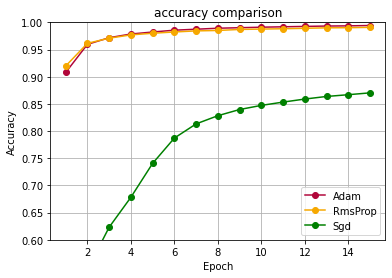

In [0]:
def plot_learning_curve(ylim=0.6):
    plt.figure()
    plt.title("accuracy comparison")
    axes = plt.gca()
    axes.set_ylim([ylim, 1])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    train_sizes = np.arange(1, 1 + len(history[0].history['accuracy']))

    plt.grid()

    plt.plot(
        train_sizes,
        history[0].history['accuracy'],
        'o-',
        color=(177/255, 6/255, 58/255),
        label="Adam"
    )
    plt.plot(
        train_sizes,
        history[1].history['accuracy'],
        'o-',
        color=(246/255, 168/255, 0),
        label="RmsProp"
    )
    
    plt.plot(
        train_sizes,
        history[2].history['accuracy'],
        'o-',
        color='green',
        label="Sgd"
    )

    plt.legend(loc="best")
    return plt

plot_learning_curve()


## Abschluss

- Stochastic Gradient Descent
führt immer zur optimalen Lösung, auch wenn das ganze ein wenig langsamer sein kann.

- Bei seltsamen Datensets kann
das Momentum Probleme bereiten
und man erhält mit SGD die korrekte Lösung. Die Wahl des Optimizers bleibt Problemabhängig